# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Dataset

In [3]:
df=pd.read_csv(r"C:\Users\HP\Downloads\New folder\21st- student mark price prediction\student_info.csv")

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.shape

(200, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# Visualizing the dataset

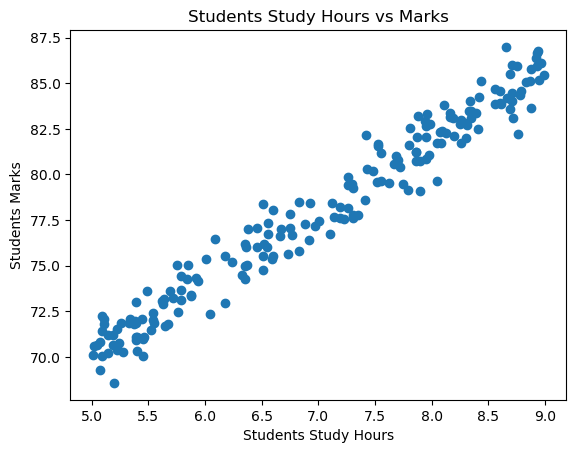

In [9]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students Marks")
plt.title("Students Study Hours vs Marks")
plt.show()

# Preparing the data for ML model

DATA CLEANING

In [10]:
df.isnull().sum()



study_hours      5
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
df2=df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


SPLIT THE DATASET

In [15]:
x=df2.drop("student_marks",axis=1)
y=df2.drop("study_hours",axis=1)
print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (200, 1)
shape of y: (200, 1)


In [16]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (160, 1)
shape of y_train: (160, 1)
shape of x_test: (40, 1)
shape of y_test: (40, 1)


SELECT A MODEL AND TRAIN IT

In [17]:
# y=mx+c

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [18]:
model.coef_

array([[3.93571802]])

In [19]:
model.intercept_

array([50.44735504])

In [20]:
m=3.93
c=50.44
y=m*4+c  # here x= 4 study hours

y

66.16

In [21]:
model.predict([[4]])[0][0].round(2)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.19)

In [22]:
y_pred=model.predict(x_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [23]:
pd.DataFrame(np.c_[x_test.values, y_test.values, y_pred],columns=["study_hours", "students_marks_actual", "students_marks_predicted"])

,study_hours,students_marks_actual,students_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


FINE-TUNE THE MODEL

In [24]:
model.score(x_test,y_test)

0.9514124242154464

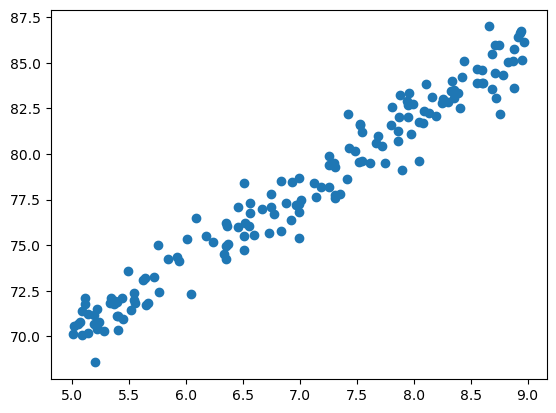

In [25]:
plt.scatter(x_train,y_train)

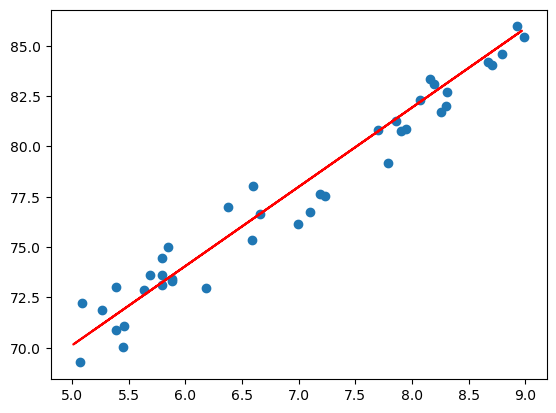

In [26]:
plt.scatter(x_test,y_test)
plt.plot(x_train,model.predict(x_train),color="r")

# SAVE THE ML MODEL

In [27]:
import joblib
joblib.dump(model,"Student_marks_Prediction.pkl")

['Student_marks_Prediction.pkl']

In [28]:
model=joblib.load("Student_marks_Prediction.pkl")

In [29]:
model.predict([[5]])[0][0]

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.12594512018406)

# Roc and AUC curve

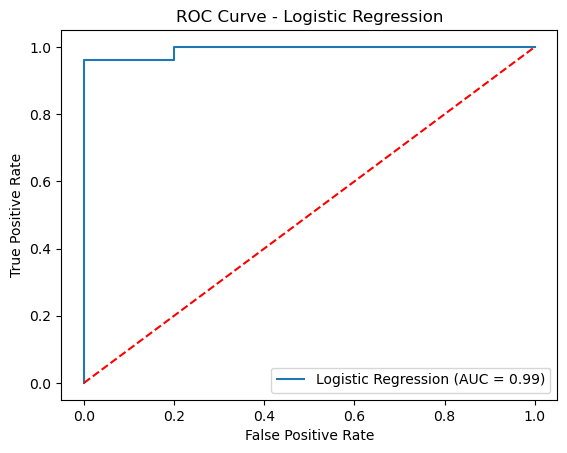

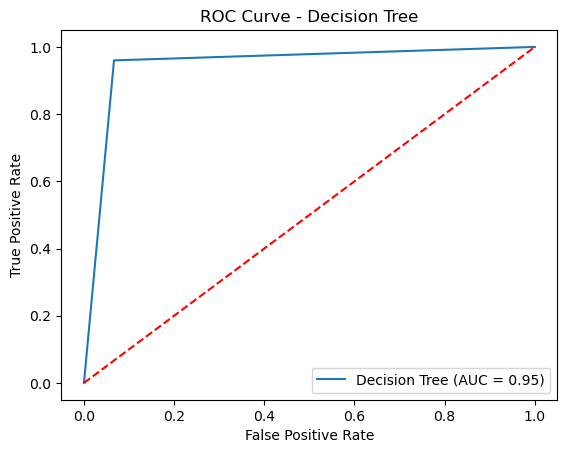

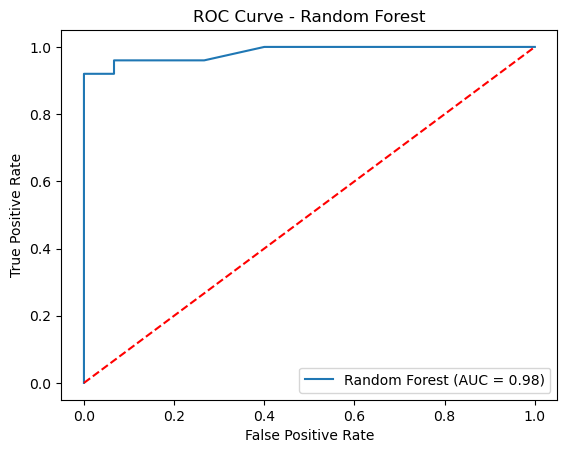

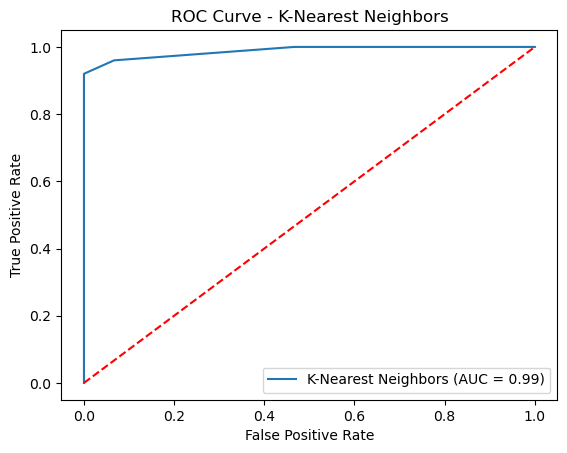

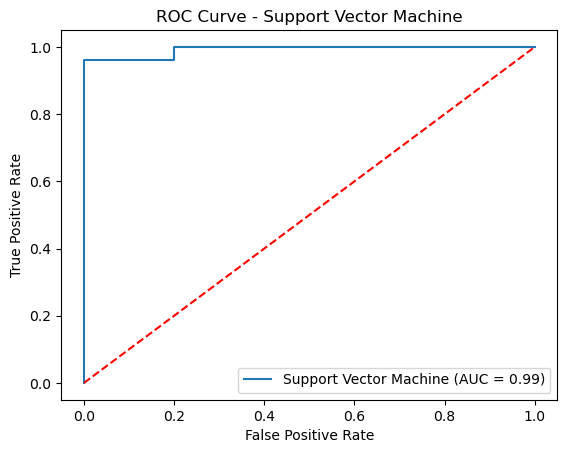

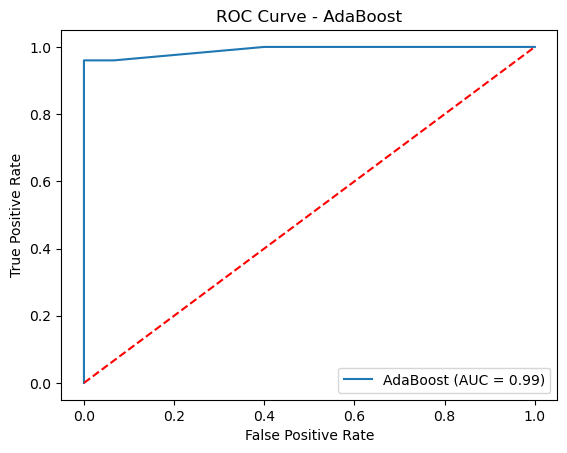

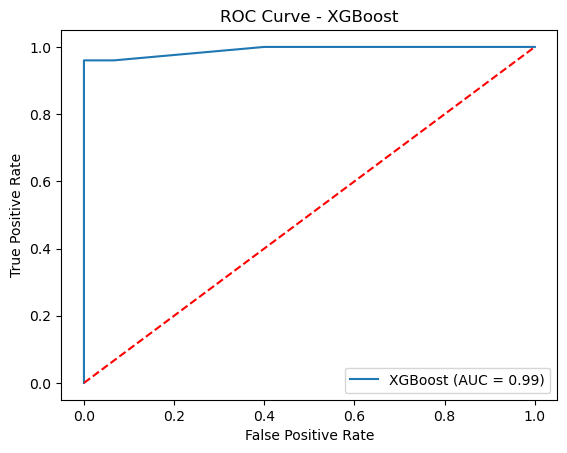

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\New folder\21st- student mark price prediction\student_info.csv')

# Create binary classification target: pass = 1 if marks ≥ 75, else 0
# Use the actual column names in the dataframe ('student_marks' and 'study_hours')
df['pass'] = np.where(df['student_marks'] >= 75, 1, 0)

# Fill missing study_hours (there are NaNs in the dataset) to avoid errors in scaling/model training
df['study_hours'] = df['study_hours'].fillna(df['study_hours'].mean())

# Split features and target using correct column names
X = df[['study_hours']]
y = df['pass']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to plot ROC for a given model
def plot_roc_curve(model, model_name):
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# 1. Logistic Regression
plot_roc_curve(LogisticRegression(), "Logistic Regression")

# 2. Decision Tree
plot_roc_curve(DecisionTreeClassifier(), "Decision Tree")

# 3. Random Forest
plot_roc_curve(RandomForestClassifier(), "Random Forest")

# 4. KNN
plot_roc_curve(KNeighborsClassifier(), "K-Nearest Neighbors")

# 5. SVM (with probability=True)
plot_roc_curve(SVC(probability=True), "Support Vector Machine")

# 6. AdaBoost
plot_roc_curve(AdaBoostClassifier(), "AdaBoost")

# 7. XGBoost
plot_roc_curve(XGBClassifier(eval_metric='logloss'), "XGBoost")
